In [1]:
import numpy as np
import xarray as xr
import os
import cmocean.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

path = '../shared_materials/Data/'

### 4 Simulations:

- **REF/Hindcast** (`ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast*`)  

  *Full atmospheric variability in turbulent & sensible heat & freshwater fluxes and windstress*
- **WIND** (`ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90*`)  
  *Only interannual atmospheric variability in windstress. Turbulent and sensible heat & freshwater fluxes from repeated year (~1990)*
- **HEAT/THERMHAL** (`ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90*`)  
  *Interannual atmospheric variability from turbulent and sensible heat & freshwater fluxes while windtress is from repeated year (~1990)*
- **CLIM/RY90** (`*ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90`)  
  *All atmospheric fluxes from repeated year (~1990)*
  
  
  
  
## TODO

* 4 Barotropic streamfunctions ()
* timeseries mean over lon/lat (filter low/highpass?)
* AREA:
    *Atlantic wide
    *(possibly LAbrador, cape Hatteras?)






In [2]:
#load means

def load_psi (file, calc_mean = False):
    ds = xr.open_dataset(path + file)#dia
    ds = ds.set_coords(('nav_lat', 'nav_lon'))
    
    if calc_mean:
        bar_str1 = ds.sobarstf.isel(time_counter = slice(0,354)).mean(dim = 'time_counter')
        bar_str2 = ds.sobarstf.isel(time_counter = slice(355,-1)).mean(dim = 'time_counter')
        bar_mean = xr.concat([bar_str1,bar_str2], dim ='time').mean(dim = 'time')
        
        return bar_mean
    else:
        return ds.sobarstf

    
def load_psi_std (file):
    ds = xr.open_dataset(path + file)#dia
    ds = ds.set_coords(('nav_lat', 'nav_lon'))
    x_min, x_max = -82, 20 #lon limits
    
    bar_std1 = ds.sobarstf.isel(time_counter = slice(0,354)).std(dim = 'time_counter')
    bar_std2 = ds.sobarstf.isel(time_counter = slice(355,-1)).std(dim = 'time_counter')
    bar_std = xr.concat([bar_std1,bar_std2], dim ='time').mean(dim = 'time')
        
    return bar_std.where((bar_std['nav_lon'] >= x_min) & (bar_std['nav_lon'] <= x_max))



In [3]:
%%time
#LOAD std Streamfunction

bar_ref_std = load_psi_std('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc')
bar_wind_std = load_psi_std('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_psi.nc')
bar_therm_std = load_psi_std('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20161231_psi.nc')#
bar_clim_std = load_psi_std('ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_psi.nc')

/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy

CPU times: user 34.4 s, sys: 26 s, total: 1min
Wall time: 2min 1s


/miniconda3/envs/py3_std/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [4]:
%%time
#LOAD mean Streamfunction

bar_ref = load_psi('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc', calc_mean = True)
bar_wind = load_psi('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_psi.nc', calc_mean = True)
bar_therm = load_psi('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20161231_psi.nc', calc_mean = True)
bar_clim = load_psi('ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_psi.nc', calc_mean = True)

CPU times: user 28.1 s, sys: 26 s, total: 54.1 s
Wall time: 1min 43s


In [5]:
#limit lons to Atlantic
x_min, x_max = -82, 20 #lon limits
#y_min, y_max = -40, -70

bar_ref = bar_ref.where((bar_ref['nav_lon'] >= x_min) & (bar_ref['nav_lon'] <= x_max))
bar_wind = bar_wind.where((bar_wind['nav_lon'] >= x_min) & (bar_wind['nav_lon'] <= x_max))
bar_therm = bar_therm.where((bar_therm['nav_lon'] >= x_min) & (bar_therm['nav_lon'] <= x_max))
bar_clim = bar_clim.where((bar_clim['nav_lon'] >= x_min) & (bar_clim['nav_lon'] <= x_max))




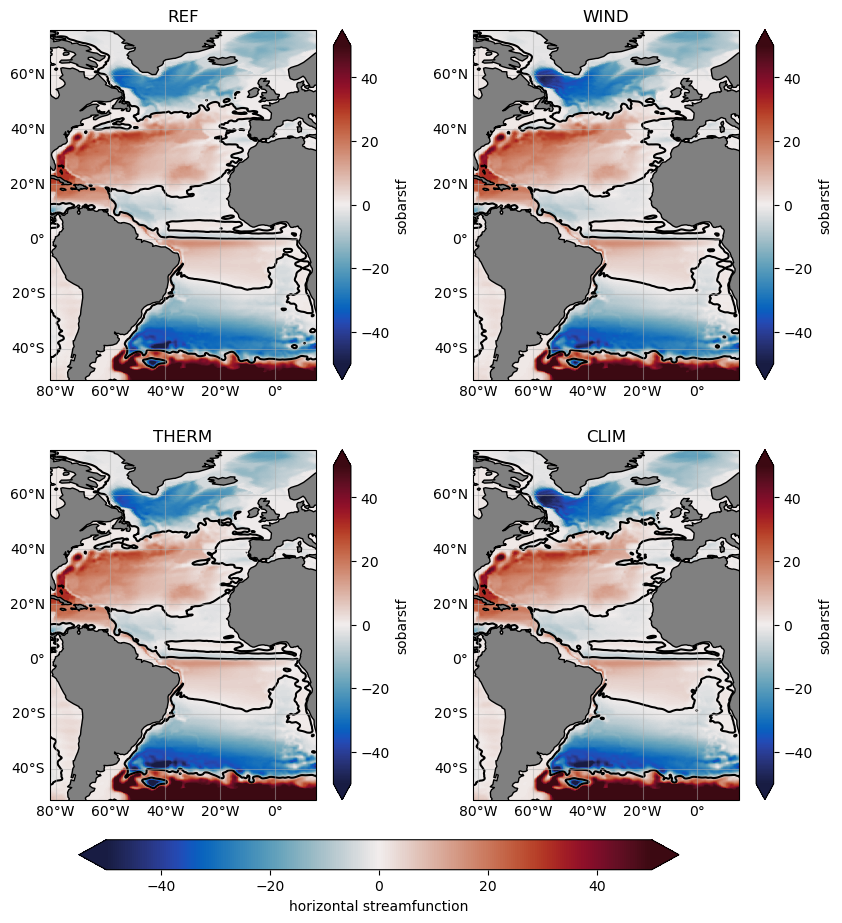

In [32]:

proj = ccrs.PlateCarree()
black_cmap = ListedColormap(['black'])

streamf_list = [bar_ref/1e6, bar_wind/ 1e6, bar_therm/ 1e6, bar_clim/ 1e6]
title_list = ['REF', 'WIND', 'THERM', 'CLIM']
#calling GeoAxes

fig, ax = plt.subplots(2,2, figsize = (10,10),
                       subplot_kw ={ 'projection' : proj })
#plots#
for i,ax in enumerate(fig.axes):
    
    p = streamf_list[i].plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, vmax = 0.5e2, ax = ax,
                            cmap = cm.balance, add_colorbar=True)
    streamf_list[i].plot.contour(x = 'nav_lon',y = 'nav_lat', ax = ax,  transform = proj, levels = [0], cmap = black_cmap)


    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-82,15,-40,70))
    ax.set_title(title_list[i])
    

cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'both')
cbar_ax.set_xlabel('horizontal streamfunction');  # cax == cb.ax:

    

/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


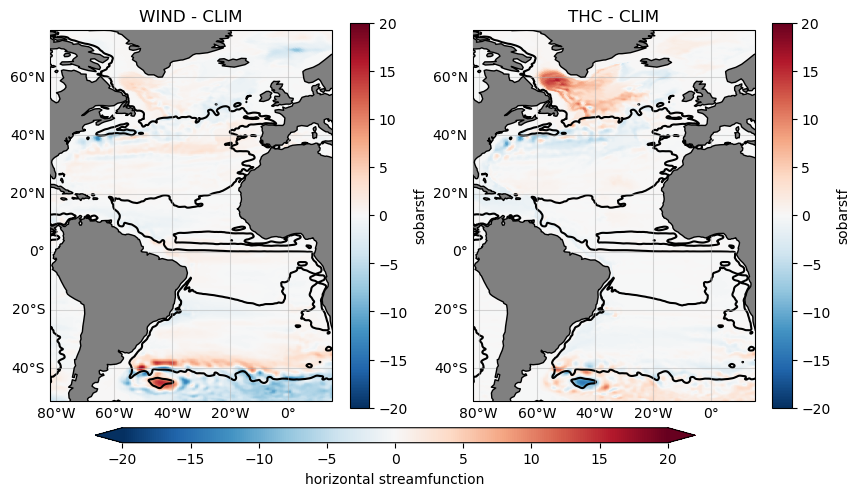

In [37]:
#diff to clim plots
fig, ax = plt.subplots(1,2, figsize = (10,5),
                       subplot_kw ={ 'projection' : proj })

diff_clim_list = [(bar_wind - bar_clim)/1e6, (bar_therm-bar_clim)/1e6]
title_list = ['WIND - CLIM', 'THC - CLIM']
#plots#
for i,ax in enumerate(fig.axes):
    
    p = diff_clim_list[i].plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, vmax = 20, ax = ax,
                            add_colorbar=True)
    bar_ref.plot.contour(x = 'nav_lon',y = 'nav_lat', ax = ax,  transform = proj, levels = [0], cmap = black_cmap)


    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-82,15,-40,70))
    ax.set_title(title_list[i])
    

cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'both')
cbar_ax.set_xlabel('horizontal streamfunction');  # cax == cb.ax
    

Differences between WIND-CLIM and THERM-CLIM; Contour shows REF streamfunction

/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


Text(0.5, 0, 'std horizontal streamfunction')

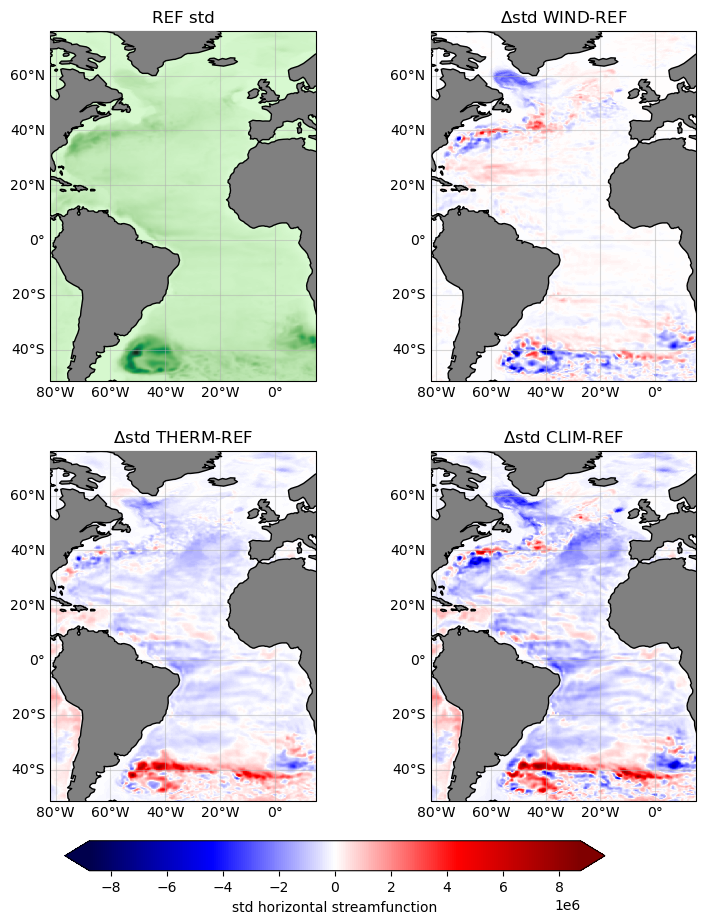

In [8]:

proj = ccrs.PlateCarree()
black_cmap = ListedColormap(['black'])

streamf_list = [bar_ref_std, bar_wind_std - bar_ref_std, bar_therm_std -bar_ref_std, bar_clim_std-bar_ref_std]
title_list = ['REF std', '$\Delta$std WIND-REF', '$\Delta$std THERM-REF', '$\Delta$std CLIM-REF']
cmap_list = [cm.algae, 'seismic', 'seismic', 'seismic']
#calling GeoAxes

fig, ax = plt.subplots(2,2, figsize = (9,10),
                       subplot_kw ={ 'projection' : proj })
#plots#
for i,ax in enumerate(fig.axes):
    
    p = streamf_list[i].plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, ax = ax,
                            cmap = cmap_list[i], add_colorbar=False)
    #streamf_list[i].plot.contour(x = 'nav_lon',y = 'nav_lat', ax = ax,  transform = proj, levels = [0], cmap = black_cmap)


    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-82,15,-40,70))
    ax.set_title(title_list[i])
    

cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'both')
cbar_ax.set_xlabel('std horizontal streamfunction')  # cax == cb.ax
    

# Timeseries

In [9]:
# Time series
#x_start = 31
#x_end = 50
#GULF
gulf_x = (-80, -65)#_boxmin, x_boxmax = -80, -65 #lon limits
gulf_y = (30, 51)#y_boxmin, y_boxmax = 30, 51
gulf_x_list = [gulf_x[0],gulf_x[0],gulf_x[1],gulf_x[1],gulf_x[0]]
gulf_y_list = [gulf_y[0],gulf_y[1],gulf_y[1],gulf_y[0],gulf_y[0]]

#LS
#x_start = 59
#x_end = 64
lab_x = (-60, -52)#_boxmin, x_boxmax = -80, -65 #lon limits
lab_y = (59, 64)#y_boxmin, y_boxmax = 30, 51
lab_x_list = [lab_x[0],lab_x[0],lab_x[1],lab_x[1],lab_x[0]]
lab_y_list = [lab_y[0],lab_y[1],lab_y[1],lab_y[0],lab_y[0]]


Text(0.5, 1.0, 'Timeseries Boxes')

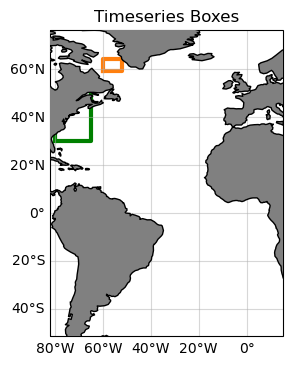

In [48]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(1,1, figsize = (3,5),
                       subplot_kw ={ 'projection' : proj })
#plots#

#p = bar_ref.plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, vmax = 0.5e8, ax = ax,
#                            cmap = cm.balance)

ax.plot(gulf_x_list,gulf_y_list, lw = 3, color = 'green',label = 'Gulfstream box')
ax.plot(lab_x_list,lab_y_list, lw = 3, color = 'tab:orange',label = 'Lab. Sea box')
gl = ax.gridlines(draw_labels = True, alpha = 0.5)
gl.top_labels = False
gl.right_labels = False
    
ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
ax.set_extent((-82,15,-40,70))
ax.set_title('Timeseries Boxes')
# ax.legend();

In [11]:
def box_timeseries(file, x_boxmin, x_boxmax,y_boxmin, y_boxmax):
    
    ds = xr.open_dataset(path + file)#dia
    ds = ds.set_coords(('nav_lat', 'nav_lon'))
    ds = ds.sobarstf
    
    lons = np.array(ds.nav_lon)
    lats = np.array(ds.nav_lat)
    mask = np.logical_and.reduce((lons >= x_boxmin, lons <= x_boxmax, lats >= x_boxmin, lats <= y_boxmax))
    
    arr_t1 = ds.isel(time_counter = slice(0,300)).squeeze().values
    arr_t1 =  np.mean(arr_t1[:,mask],axis = 1) 
    
    arr_t2 = ds.isel(time_counter = slice(300,600)).squeeze().values
    arr_t2 =  np.mean(arr_t2[:,mask],axis = 1) 

    arr_t3 = ds.isel(time_counter = slice(600,-1)).squeeze().values
    arr_t3 =  np.mean(arr_t3[:,mask],axis = 1) 
    

    #ts_2 =  np.mean(arr_t2[:,mask],axis = 1)
    
    return np.concatenate((arr_t1,arr_t2,arr_t3))
    
    

In [12]:

#test_ds = ds.sobarstf.isel(time_counter = slice(0,354))



In [13]:
%%time
ts_ref = box_timeseries('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc', 
                        gulf_x[0], gulf_x[1], gulf_y[0], gulf_y[1])
ts_wind = box_timeseries('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_psi.nc', 
                       gulf_x[0], gulf_x[1], gulf_y[0], gulf_y[1])
ts_therm = box_timeseries('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20161231_psi.nc', 
                        gulf_x[0], gulf_x[1], gulf_y[0], gulf_y[1])
ts_clim = box_timeseries('ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_psi.nc', 
                        gulf_x[0], gulf_x[1], gulf_y[0], gulf_y[1])

CPU times: user 18.5 s, sys: 21.2 s, total: 39.7 s
Wall time: 1min 22s


In [14]:
#get timevector
ds = xr.open_dataset(path + 'ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc')#dia
time_vec = ds.time_counter[1:]
ds.close()


Text(0.5, 1.0, 'PSI- unfiltered')

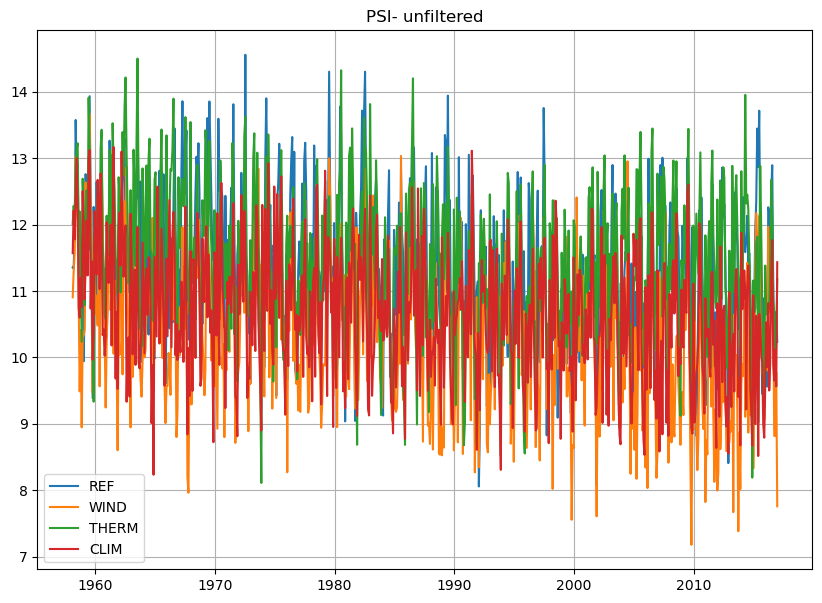

In [49]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

ax.plot(time_vec,ts_ref/1e6, label = 'REF')
ax.plot(time_vec,ts_wind/1e6, label = 'WIND')
ax.plot(time_vec,ts_therm/1e6, label = 'THERM')
ax.plot(time_vec,ts_clim/1e6, label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('PSI- unfiltered')

In [16]:
def moving_average(x, w): #wwindowsize in months
    return np.convolve(x, np.ones(w), 'valid') / w

Text(0.5, 1.0, 'Gulf Stream - PSI - 12 month rolling mean')

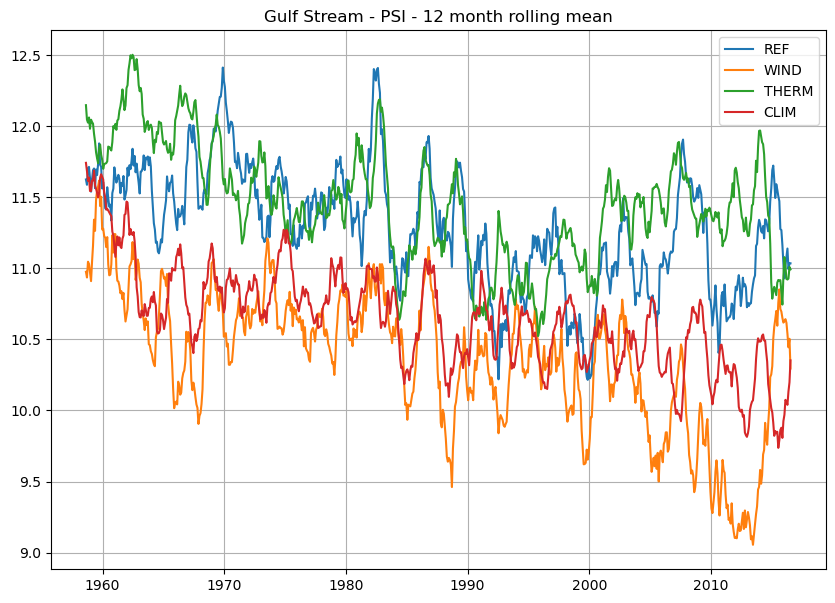

In [53]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

ax.plot(time_vec[6:-5],moving_average(ts_ref/1e6,12), label = 'REF')
ax.plot(time_vec[6:-5],moving_average(ts_wind/1e6,12), label = 'WIND')
ax.plot(time_vec[6:-5],moving_average(ts_therm/1e6,12), label = 'THERM')
ax.plot(time_vec[6:-5],moving_average(ts_clim/1e6,12), label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Gulf Stream - PSI - 12 month rolling mean')

In [18]:
%%time
#Lab
ts_ref = box_timeseries('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc', 
                        lab_x[0], lab_x[1], lab_y[0], lab_y[1])
ts_wind = box_timeseries('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_psi.nc', 
                       lab_x[0], lab_x[1], lab_y[0], lab_y[1])
ts_therm = box_timeseries('ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20161231_psi.nc', 
                        lab_x[0], lab_x[1], lab_y[0], lab_y[1])
ts_clim = box_timeseries('ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_psi.nc', 
                        lab_x[0], lab_x[1], lab_y[0], lab_y[1])

CPU times: user 18.4 s, sys: 21.1 s, total: 39.5 s
Wall time: 1min 22s


Text(0.5, 1.0, 'Labrador sea - PSI - 12 month rolling mean')

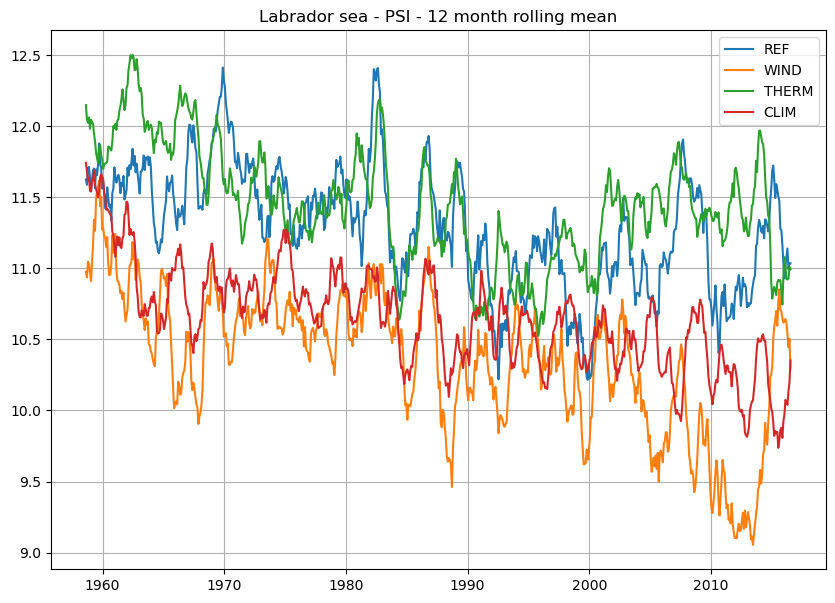

In [55]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

ax.plot(time_vec[6:-5],moving_average(ts_ref/1e6,12), label = 'REF')
ax.plot(time_vec[6:-5],moving_average(ts_wind/1e6,12), label = 'WIND')
ax.plot(time_vec[6:-5],moving_average(ts_therm/1e6,12), label = 'THERM')
ax.plot(time_vec[6:-5],moving_average(ts_clim/1e6,12), label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Labrador sea - PSI - 12 month rolling mean')